## Bike-sharing service

### Problem statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**The company wants to know:**

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleaning and  Analysis

In [5]:
# check null values
# no null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Check correlation**
- month and seasone are highly correlated
- atemp and temp are highly correlated
- cnt and registered are highly correlated
- temp and atemps columns are highly negatively correlated with windspeed

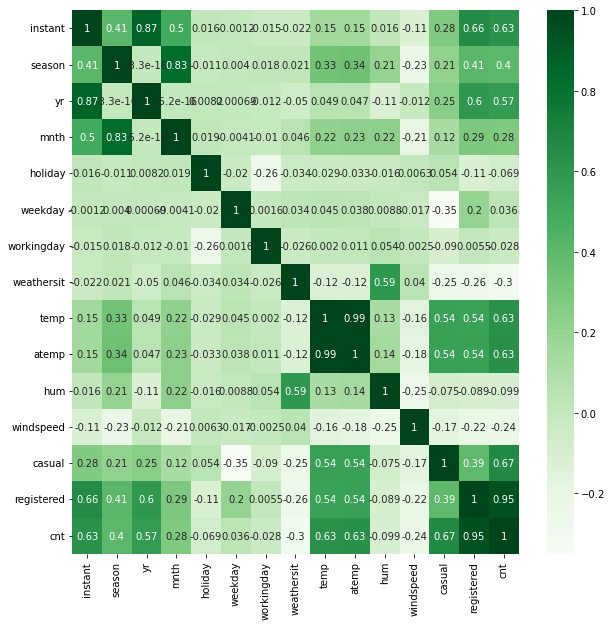

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

### cnt
- no outlier present

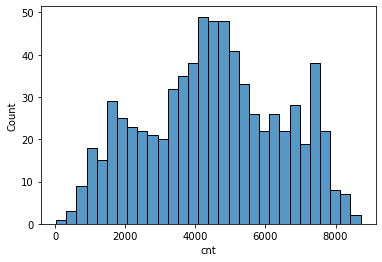

In [7]:
sns.histplot(df['cnt'], bins=30)
plt.show()

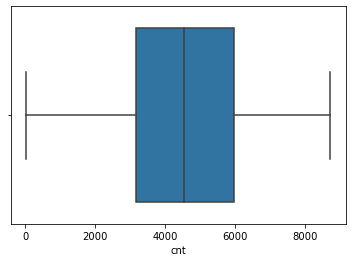

In [8]:
# no outlier present
sns.boxplot(df['cnt'])
plt.show()

### instant

In [9]:
# instant is index which has no use in model
df.instant.head()

0    1
1    2
2    3
3    4
4    5
Name: instant, dtype: int64

In [10]:
# drop instant
df.drop('instant',axis=1,inplace=True)

### dteday

In [11]:
df['dteday'].head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

In [12]:
# change the datatype
df['dteday'] = pd.to_datetime(df['dteday'])

### season
- The model consider below values as ordinal data
- but season is a categorical column, so replace with there corresponding values
- 1:spring, 2:summer, 3:fall, 4:winter
- fall and summer has higest count
- spring has lowest rental count

In [13]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
# replace the numerical value with there corresponding season
d = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].apply(lambda x: d[x])

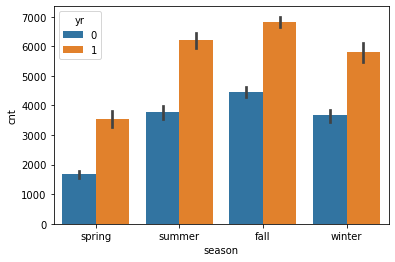

In [15]:
# spring has lowest rental count
sns.barplot(x = df['season'] ,y=df['cnt'], hue=df['yr'])
plt.show()

### yr
- year (0: 2018, 1:2019)
- The rental numbers increases in 2019 as compared to 2018

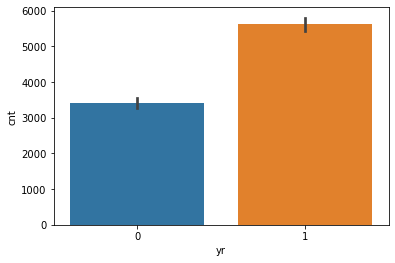

In [16]:
sns.barplot(x = df['yr'] ,y=df['cnt'])
plt.show()

### mnth
- Following months has high rental count: May, Jun, Jul, Aug, Sep, Oct
- Jan and Dec has low rental count
- count is low at the start and end of the year

In [17]:
df['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [18]:
# replace the numbers from mnth column with there corresponding values
import calendar

df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

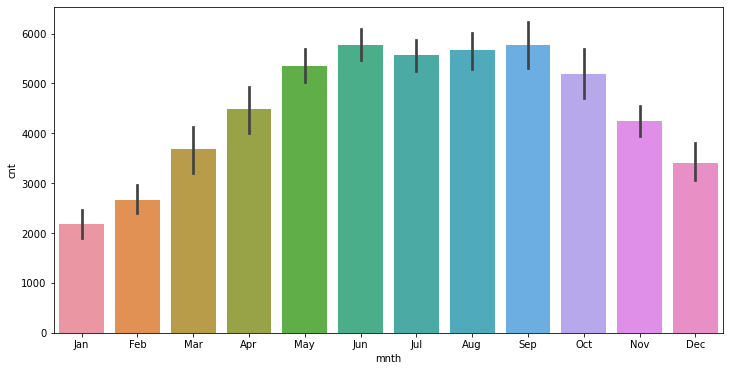

In [19]:
# month follow certain trend
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='mnth',y='cnt')
plt.show()

### weekday
- minor difference in weekdays

In [20]:
df['weekday'].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [21]:
# replace the numbers from weekday column with there corresponding values

df['weekday'] = df['weekday'].apply(lambda x: calendar.day_abbr[x])

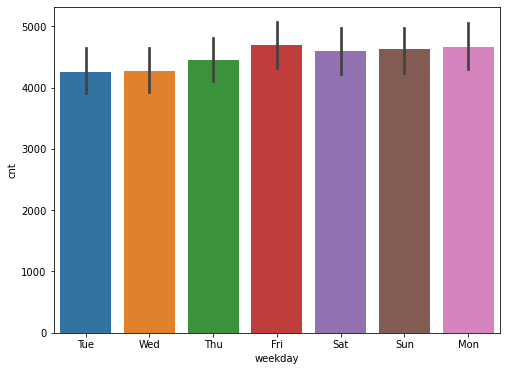

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='weekday',y='cnt')
plt.show()

### weathersit
- When weather is clear count is high
- When there is a light rain count of rent decreases
- Heavy rain is not present in data (i think in heavy rain no has taken bikes for rent)

 weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy -> Clear
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -> Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -> Light rain
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -> Heavy rain



**replace weathersits as**
- 1 - Clear
- 2 - Mist
- 3 - Light rain
- 4 - Heavy rain


In [23]:
# 4 is not present in dataset
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [24]:
weather = {1:'Clear', 2:'Mist', 3:'Light rain', 4:'Heavy rain'}
df['weathersit'] = df['weathersit'].apply(lambda x: weather[x])

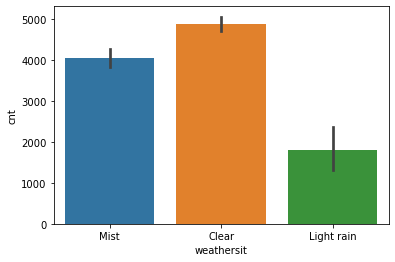

In [25]:
sns.barplot(data=df, x='weathersit', y='cnt')
plt.show()

### holiday
- In holiday people have taken less bikes for rent
- when light rain is there in holiday people avoid to take bikes

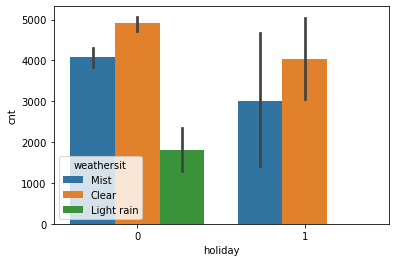

In [26]:
sns.barplot(df['holiday'], df['cnt'], hue=df['weathersit'])
plt.show()

### workingday
- Whethere there is a workingday or not, there is no much impact of rents

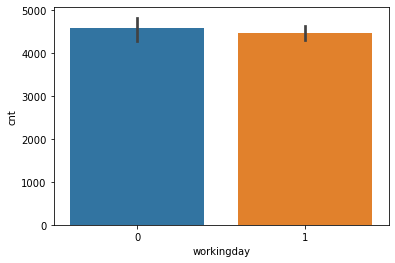

In [27]:
sns.barplot(df['workingday'], df['cnt'])
plt.show()

### temp
- cnt is linearly dependent on temp
- cnt is high when wether is clear

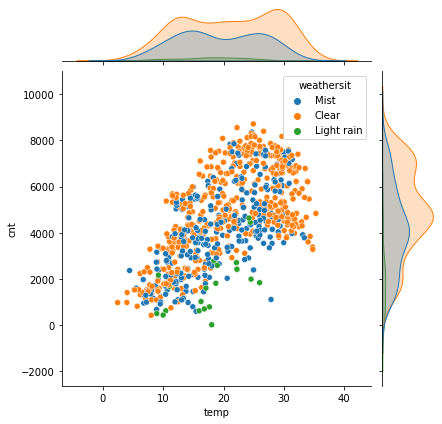

In [28]:
sns.jointplot(data = df, x='temp', y='cnt', hue='weathersit')
plt.show()

### atemp
- atemp and temp explain same variance

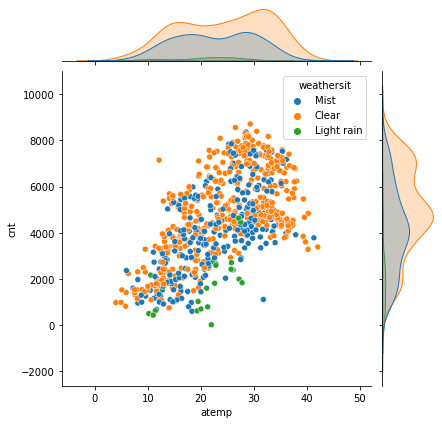

In [29]:
sns.jointplot(data = df, x='atemp', y='cnt', hue='weathersit')
plt.show()

### Hum
- humidity cannot be zero there is a outlier
- humidity changes as weathersit change
    - clear has low humidity
    - Mist has humidity higher than clear
    - Light rain has high humidity

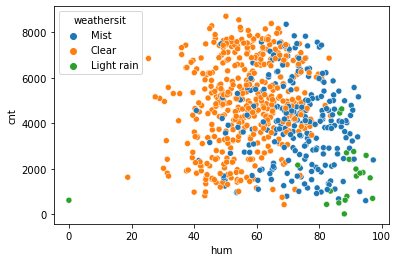

In [30]:
sns.scatterplot(data = df, x='hum', y='cnt',hue='weathersit')
plt.show()

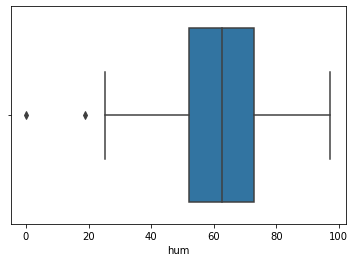

In [31]:
# check outliers
sns.boxplot(df['hum'])
plt.show()

In [32]:
# remove outliers
df = df[df['hum'] >20]

### windspeed

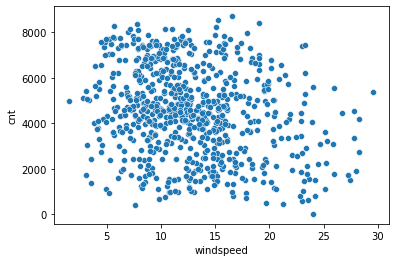

In [33]:
sns.scatterplot(data = df, x='windspeed', y='cnt')
plt.show()

### casual and registered

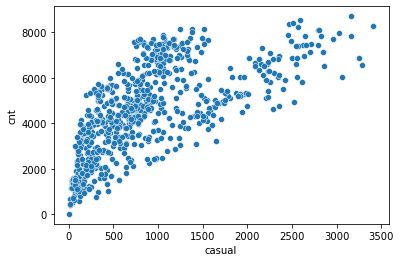

In [34]:
sns.scatterplot(data = df, x='casual', y='cnt')
plt.show()

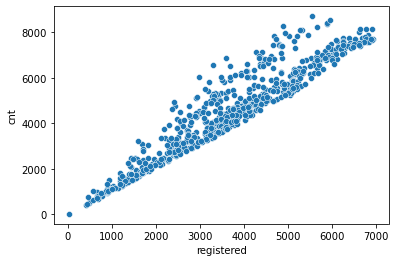

In [35]:
sns.scatterplot(data = df, x='registered', y='cnt')
plt.show()

In [36]:
# shape of dataframe
df.shape

(728, 15)

### Drop unwanted columns
- required information is extracted from dteday
- cnt is the addition of casual and registered useres hence drop both the columns

In [37]:
# The required information is extracted from dteday. Hence drop this column
df.drop('dteday',axis=1, inplace=True)

In [38]:
# cnt is the addition of casual and registered useres hence drop both the columns
df.drop(['casual','registered'],axis=1, inplace=True)

In [39]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Tue,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Thu,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Pairplot
- temp column has highest correlation with cnt column

<Figure size 720x720 with 0 Axes>

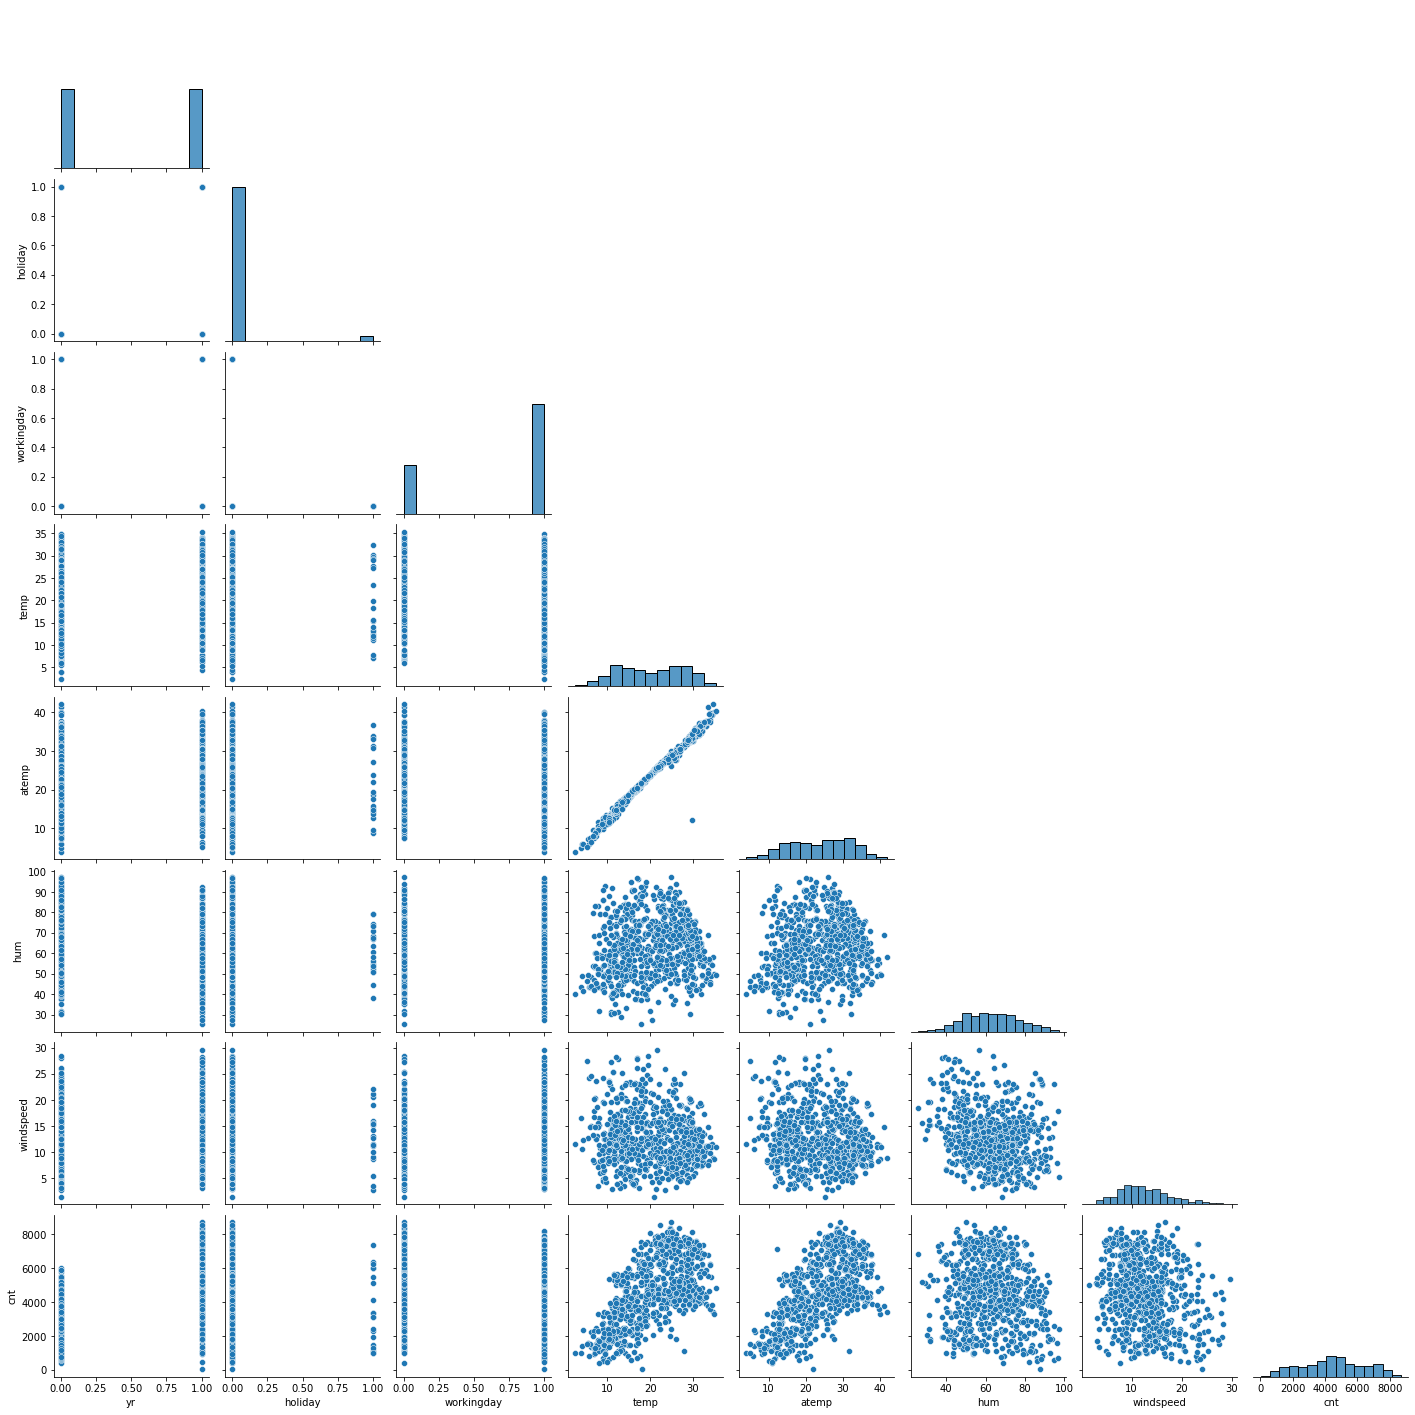

In [40]:
plt.figure(figsize=(10,10))
sns.pairplot(df, corner=True)
plt.show()

### create dummy variables

In [41]:
dummy_columns = ['season','mnth','weekday','weathersit']
dummy_value = pd.get_dummies(df[dummy_columns], drop_first=True)

In [42]:
new_df = pd.concat([df,dummy_value], axis=1)
new_df.drop(dummy_columns, axis=1, inplace=True)

In [43]:
new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
new_df.shape

(728, 30)

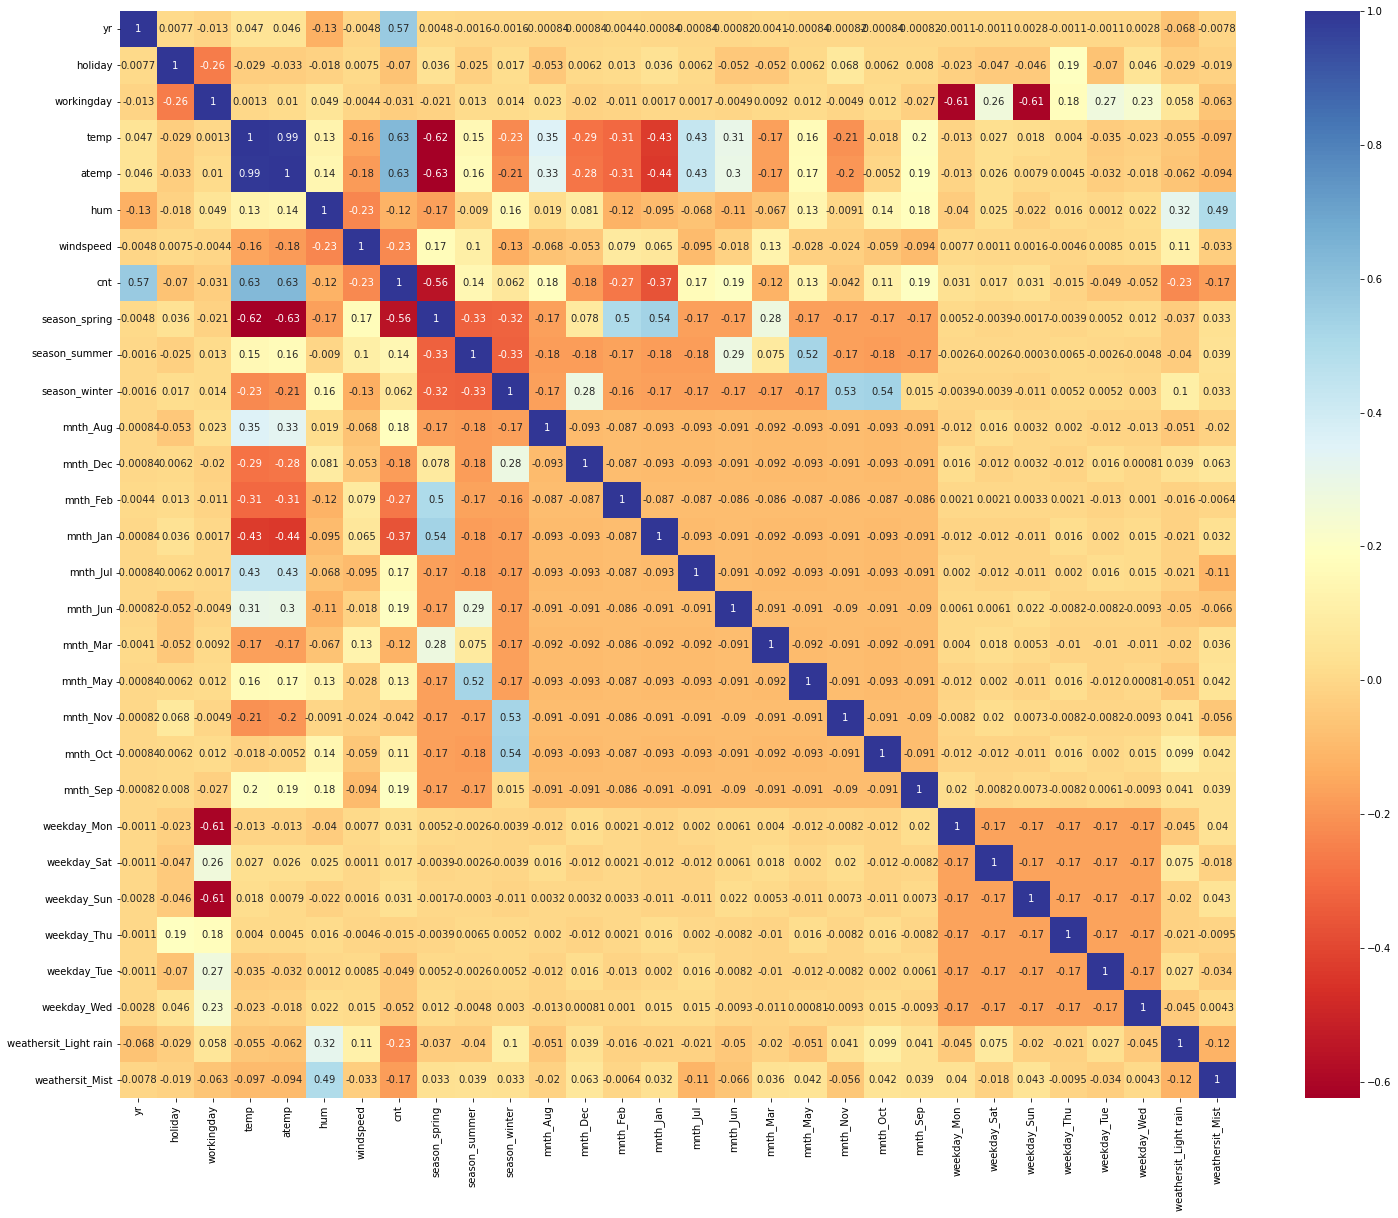

In [45]:
plt.figure(figsize = (25,20))
sns.heatmap(new_df.corr(), annot=True, cmap='RdYlBu')
plt.show()

### split data into train and test set

In [46]:
# create dependent and independent variables
X = new_df.drop('cnt',axis=1)
y = new_df['cnt']

In [47]:
# split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X_train.shape, y_train.shape

((509, 29), (509,))

In [49]:
X_test.shape, y_test.shape

((219, 29), (219,))

### Scaling

In [50]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# variables which has to scale
var = ['temp', 'atemp','hum', 'windspeed']

# training set
X_train[var] = scaler.fit_transform(X_train[var])

# test set
X_test[var] = scaler.transform(X_test[var])

In [51]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
584,1,0,1,0.860857,0.825185,0.582947,0.220835,0,0,0,...,0,0,0,0,0,0,0,0,0,1
710,1,0,1,0.297020,0.286507,0.395591,0.351466,0,0,1,...,0,0,0,0,0,0,0,0,0,1
331,0,0,1,0.553679,0.539562,0.680570,0.299413,0,0,1,...,0,0,0,0,0,1,0,0,0,0
453,1,0,0,0.387359,0.389264,0.454756,0.289273,0,1,0,...,0,0,0,0,1,0,0,0,0,1
106,0,0,1,0.495350,0.481247,0.313804,0.702966,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Model building

### sklearn linear regression model using all features

In [52]:
# using sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
# check accuracy
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

from sklearn.metrics import r2_score
print(f'Train accuracy: {r2_score(y_train, y_train_pred)}')
print(f'Test accuracy: {r2_score(y_test, y_test_pred)}')

Train accuracy: 0.8441834083541138
Test accuracy: 0.8281255072865399


### RFE

In [54]:
from sklearn.feature_selection import RFE
# create object of rfe and find top 15 features
rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', False, 2),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 15),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 12),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 13),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 9),
 ('weekday_Thu', False, 4),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 3),
 ('weathersit_Light rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [56]:
# take the top 15 columns 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'mnth_Jul', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep',
       'weekday_Tue', 'weathersit_Light rain', 'weathersit_Mist'],
      dtype='object')

In [57]:
# take the top 15 columns for training and testing
X_train = X_train[col]
X_test = X_test[col]

### Create a class for statmodel, vif and r2_score
- We have to write code again and again to create model
- for that a class is created which takes X_train and y_train data 
- the following methods are created
    - fit - create OLS model  
    - vif - vif for current training variables
    - r2 - return r2_train, r2_test, y_train_pred, y_test_pred
    - model_summary - return summary of model

In [58]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

class Model:
    def __init__(self, X_train, y_train, add_constant=True):
        self.X_train = X_train
        self.y_train = y_train
        self.X_train_sm = sm.add_constant(self.X_train) if add_constant else self.X_train
        self.lr_model = None
        
    def fit(self):
        lr = sm.OLS(self.y_train, self.X_train_sm)
        self.lr_model = lr.fit()
        
    def vif(self):
        vif = pd.DataFrame()
        vif['Features'] = self.X_train.columns
        vif['VIF'] = [variance_inflation_factor(self.X_train.values, i) for i in range(self.X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        return vif.sort_values('VIF', ascending=False)
        
    def r2(self, X_test, y_test):
        if self.lr_model is None:
            raise ValueError("Model has not been trained. Call 'fit' method first.")
        
        y_train_pred = self.lr_model.predict(self.X_train_sm)
        r2_train = r2_score(self.y_train, y_train_pred)

        X_test_sm = sm.add_constant(X_test) if self.lr_model.model.exog.shape[1] > 1 else X_test
        y_test_pred = self.lr_model.predict(X_test_sm)
        r2_test = r2_score(y_test, y_test_pred)

        return r2_train, r2_test, y_train_pred, y_test_pred
    
    def model_summary(self):
        if self.lr_model is None:
            raise ValueError("Model has not been trained. Call 'fit' method first.")
        print(self.lr_model.summary())


In [59]:
# create a function to drop column from training and test set
def drop_column(column_name):
    X_train.drop(column_name,axis=1, inplace=True)
    X_test.drop(column_name,axis=1, inplace=True)

### Model 1
- atemp has high vif
- atemp is not significant because it's p-value is 0.414
- remove atemp

In [60]:
m1 = Model(X_train, y_train)
m1.fit()

In [61]:
m1.vif()

,Features,VIF
3,atemp,360.35
2,temp,354.32
4,hum,11.94
5,windspeed,4.82
14,weathersit_Mist,2.44
0,yr,2.01
6,season_spring,1.98
7,mnth_Jul,1.59
13,weathersit_Light rain,1.35
11,mnth_Sep,1.31


In [62]:
m1.model_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.88e-184
Time:                        12:33:45   Log-Likelihood:                -4104.8
No. Observations:                 509   AIC:                             8242.
Df Residuals:                     493   BIC:                             8309.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3396.38

In [63]:
# drop atemp column
drop_column('atemp')

### Model 2
- vif of hum column is high
- mnth_May is insignificant

In [64]:
m2 = Model(X_train,y_train)
m2.fit()

In [65]:
m2.vif()

,Features,VIF
3,hum,11.50
2,temp,10.85
4,windspeed,4.78
13,weathersit_Mist,2.43
0,yr,2.01
5,season_spring,1.98
6,mnth_Jul,1.59
12,weathersit_Light rain,1.34
10,mnth_Sep,1.30
8,mnth_May,1.28


In [66]:
m2.model_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.90e-185
Time:                        12:33:47   Log-Likelihood:                -4105.1
No. Observations:                 509   AIC:                             8240.
Df Residuals:                     494   BIC:                             8304.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3423.66

In [67]:
# we first drop column with high vif
# drop mnth_May column
drop_column('hum')

### model 3
- mnth_May is insignificant, drop it


In [68]:
m3 = Model(X_train, y_train)
m3.fit()

In [69]:
m3.vif()

,Features,VIF
2,temp,6.03
3,windspeed,4.78
0,yr,2.01
4,season_spring,1.72
5,mnth_Jul,1.55
12,weathersit_Mist,1.54
9,mnth_Sep,1.28
7,mnth_May,1.27
8,mnth_Oct,1.21
6,mnth_Mar,1.18


In [70]:
m3.model_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          8.87e-182
Time:                        12:33:49   Log-Likelihood:                -4116.6
No. Observations:                 509   AIC:                             8261.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2846.30

In [71]:
# drop mnth_May
drop_column('mnth_May')

### model 4
- temp has 5.6 vif we will take this as a feature because it is important column
- so we will remove the second highest vif i.e. windspeed

In [72]:
m4 = Model(X_train, y_train)
m4.fit()

In [73]:
m4.vif()

,Features,VIF
2,temp,5.60
3,windspeed,4.78
0,yr,2.01
4,season_spring,1.70
11,weathersit_Mist,1.54
5,mnth_Jul,1.46
8,mnth_Sep,1.23
6,mnth_Mar,1.18
9,weekday_Tue,1.18
7,mnth_Oct,1.17


In [74]:
m4.model_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.38e-182
Time:                        12:33:50   Log-Likelihood:                -4117.4
No. Observations:                 509   AIC:                             8261.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2848.53

In [75]:
# drop windspeed
drop_column('windspeed')

### model 5
- Now all the features are significant and has low vif

In [76]:
m5 = Model(X_train, y_train)
m5.fit()

In [77]:
m5.vif()

,Features,VIF
2,temp,3.07
0,yr,2.00
10,weathersit_Mist,1.51
4,mnth_Jul,1.40
3,season_spring,1.36
7,mnth_Sep,1.22
5,mnth_Mar,1.18
6,mnth_Oct,1.17
8,weekday_Tue,1.17
1,holiday,1.05


In [78]:
m5.model_summary()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          2.75e-178
Time:                        12:33:52   Log-Likelihood:                -4130.4
No. Observations:                 509   AIC:                             8285.
Df Residuals:                     497   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2394.79

**Now we don't have any insignificant feature and no feature has high vif**
- sklearn Linear regression model's r2_score is 0.84 using all features
- The m5 model give 0.82 r2_score using 11 features
- *Hence we select m5 as our final model*

### Prediction and final evaluation
- take m5 as final model
- check accuracy on train and test set
- calculate RMSE value
- plot error terms
- plot regression plot between predicted and actual values

In [86]:
# take the values from class and r2 method
r2_train, r2_test, y_train_pred, y_test_pred = m5.r2(X_test,y_test)

print(f'Accuracy on Training set: {r2_train}')
print(f'Accuracy on test set: {r2_test}')

Accuracy on Training set: 0.821983607143808
Accuracy on test set: 0.806210516021939


In [80]:
# Root Mean Squared error
from sklearn.metrics import mean_squared_error
print(f'RMSE of train set: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'RMSE of test set: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

RMSE of train set: 809.0378735355197
RMSE of test set: 853.6838159346692


In [81]:
error = y_train - y_train_pred

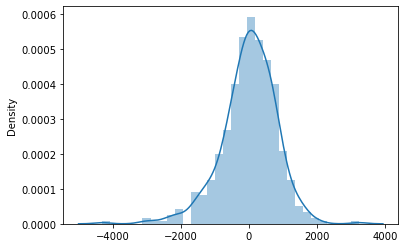

In [82]:
# error is nearly normly distributed
sns.distplot(error)
plt.show()

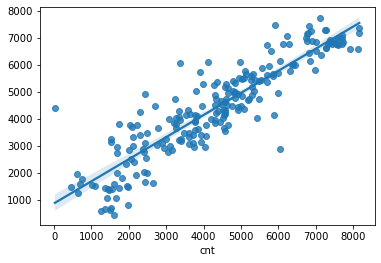

In [83]:
# regression plot of y_test vs y_test_pred
sns.regplot(y_test, y_test_pred)
plt.show()

### Features which are highly correlated with cnt 
- 1. yr
- 2. temp
- 3. season_spring (negative correlation)

In [84]:
# check top 3 features which are highly correlated with cnt 
X_train['ct'] = y_train

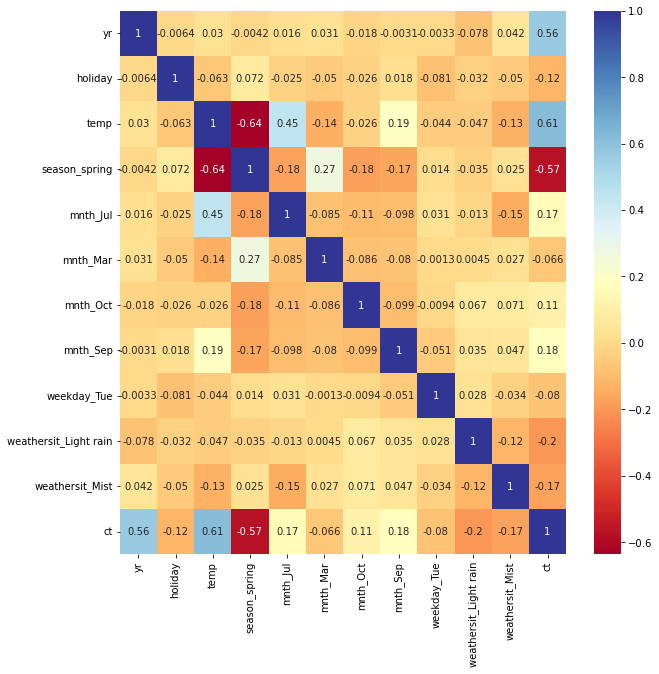

In [85]:
plt.figure(figsize= (10,10))
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlBu')
plt.show()